

1. What are the differences between hyperparameters and parameters of a machine learning (ML) model? Explain your answer using at least two machine learning models that you have learned in this unit.<br>

2. Prove that Elastic net can be used as either LASSO or Ridge regulariser.<br>

<b>Background</b><br>
The recently started human and other genome projects are likely to change the situation of molecular biology. Comprehensive analyses of whole genomic sequences will enable us to understand the general mechanisms of how protein and nucleic acid functions are encoded in the sequence data.<br>

<b>Dataset filename:</b> yeast2vs4.csv<br>

<b>Dataset description:</b> There are 8 features and one target in the dataset. All the features are in a numerical format, and the target is in text format. For further information about the attributes, please read “Data Set Information.pdf”.<br>

3. Analyse the importance of the features for predicting presence or absence of protein using two different approaches. Explain the similarity/difference between outcomes.<br>

4. Create three supervised machine learning (ML) models except any ensemble approach for predicting presence or absence of protein.<br>

    a. Report performance score using a suitable metric. Is it possible that the presented result is an overfitted one? Justify.<br>
    
    b. Justify different design decisions for each ML model used to answer this question.<br>
    
    c. Have you optimized any hyper-parameters for each ML model? What are they? Why have you done that? Explain.<br>
    
    d. Finally, make a recommendation based on the reported results and justify it.<br>

## <u>Solution</u>

1. What are the differences between hyperparameters and parameters of a machine learning (ML) model? Explain your answer using at least two machine learning models that you have learned in this unit.

Hyperparameters and parameters are two different things, usually people get confused with both and use the terms interchangeably. Both convey different things and has their own role in a model.They play crucial role in training and fine tuning a model but have different characteristics and roles.<br>

<u>Hyperparameters</u><br>
Parameters whose values that are declared before the model's training are called as Hyperparameters. These values control the learning process of a model which at the end learns the parameters during training. The way the model learns the parameters are influenced by these factors. i.e. These hyperparameters tells the model how to learn certain parameters, how many times the learning needs to be done, how deep it should be done etc. The hyperparameters are said to be external to the model because the values cannot be changed by the model.<b>(Parameters and Hyperparameters in Machine Learning and Deep Learning (2020):Hyperparameters)</b>. Hyperparameters are not tied to a specific machine learning algorithm. Many hyperparameters can be applied across different types of models.Hyperparameters indirectly impact the model's performance and how quickly it converges during training. They guide the optimization process.They are typically determined by trial and error or through automated hyperparameter tuning techniques.Hyperparameters are often tuned using techniques like cross-validation, where different combinations are tested to find the values that yield the best model performance.Optimizing hyperparameters is essential for ensuring that a model generalizes well to unseen data. A model with poorly chosen hyperparameters might perform well on the training data but poorly on new, unseen data.<br>
Some of the examples of hyperparameters are: Learning rate, Number of iterations, Number of hidden layers etc<br><br>
<u>Parameters</u><br>
Parameters are variables that a model learns while it is being trained using a dataset. There is no involvement of the user in deciding the parameters of a ML model, these are automatically decided or found out when a model is being trained. These value are suspectable to change with change in the data that is used for training. These are internal to the model as they are decided by mapping a way between the input features and the target value. Initially these values are set with some random values or set to zero, then they will be updated by the learning algorithm. i.e Parameters are the model coefficient that are changed during training to fit the data.<b>(Difference Between Parameters and Hyperparameters(2023):What are the Parameters?)</b> Parameters are unique to a particular machine learning model or algorithm. Different algorithms have their own sets of parameters.Parameters directly affect the model's output and its ability to capture patterns in the data.Parameters are learned by optimizing the model during training. This optimization process aims to minimize a loss function, making the model's predictions as accurate as possible.<br>
Some of the examples of parameters are: the coefficients, the weights and biases etc.<br>

Lets explain the difference between Hyperparameters and Parameters using two Machine Learning Models: Linear Regression and Neural Network

<b>Linear Regression</b>

In [1]:
from sklearn.linear_model import LinearRegression #Importing the libraries

X= [[1],[2],[3],[4],[5]] #Sample Data
y=[2,4,6,8,10]

model1 = LinearRegression() #No hyperparameters defined, only the default value present
model1.fit(X,y)


LinearRegression()

In [2]:
#The parameters of a LinearRegression model is its coefficient(weights) associated with the data.
print("Parameter of this LinearRegression models are :",model1.coef_) #printing the coeffiecient
print("Model Slope : ",model1.coef_[0])
print("Model Intercept : ",model1.intercept_)

Parameter of this LinearRegression models are : [2.]
Model Slope :  2.0000000000000004
Model Intercept :  -1.7763568394002505e-15


The above cell means the feature value needs to be multiplied by the coefficient and add the intercept to get the target value. These values were not predefined. The learning algorithm itself found this formula by finding the pattern and substituting the value in its corresponding equation.

In [3]:
model2 = LinearRegression(fit_intercept=False,n_jobs=10) #Externally defining the hyperparameters
model2.fit(X,y)

LinearRegression(fit_intercept=False, n_jobs=10)

In [4]:
print("Hyperparameter of this LinearRegression models is :",model2.get_params()) #printing the coeffiecient

Hyperparameter of this LinearRegression models is : {'copy_X': True, 'fit_intercept': False, 'n_jobs': 10, 'normalize': 'deprecated', 'positive': False}


From the above we can see the Hyperparameters used in this LinearRegression model. There are default values for each algorithm but here we explicitly added two of them. One is to tell the model whether to fit the model with intercept or not for which we choose False and the n_jobs parameter tells the algorithm to use the data how many times.
Notice all these were predefined before model was trained, it was stated in the model initialization.

<b>Parameters</b> in Linear Regression are the coefficients(weights) that the algorithm found for each feature in our data. These coefficient decides the slope and intercept of the Linear equation to find the best fit line. The model reaches this value by a trial and error method to reduce error with the predicted and actual value. This is not defined by the user, the algorithm finds itself using the data.<br><br>

<b>Hyperparameter</b> in Linear Regression are defined before model training and decide how the model is trained. Number of iterations is a hyperparameter of linear regression which decides the how many times the model is run for a larger data to get an optimum score. Since these hyperparameters are predefined it can be difficult to get an optimum value, so we can tune these hyperparameters using different methods.

<b>Neural Network</b>

In [5]:
from tensorflow.keras.models import Sequential  #A sequential model 
from tensorflow.keras.layers import Dense       #Method to add layers to NN

X= [[1],[2],[3],[4],[5]] #Sample data
y=[2,4,6,8,10]

In [6]:
model = Sequential()
model.add(Dense(units=5,activation='relu',input_dim=1)) #Hidden Layer
model.add(Dense(units=1,activation='linear')) #Output Layer

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error') #Here we are providing values for the hyperparameter for our NN model
model.fit(X,y,epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 6ms/step - loss: 30.8050
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 30.7420
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 30.6790
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 30.6159
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 30.5528
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 30.4896
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 30.4264
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 30.3632
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 30.3000
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 30.2367


In [8]:
#Lets see the parameters that the model learned during training

print("Weights off NN Hidden layer : ", model.layers[0].get_weights()[0])
print("\Biases off NN Hidden layer : ", model.layers[0].get_weights()[1])

Weights off NN Hidden layer :  [[ 0.41003978 -0.41115594 -0.08326435 -0.13573623 -0.7971568 ]]
\Biases off NN Hidden layer :  [0.01000038 0.         0.         0.         0.        ]


Neural Network consist of nodes and layers, they are more complex than regular ML models. Each layer performs n number of computation and backpropogation to give a good result.<br><br>
<b>Parameters</b> of Neural Network are the Weights and Biases of each layer. These are learned during the training, it varies on the data on which model is trained. These values are initialy a random value or set to zero then by trial and error methods these parameters are automatically updated by the model to get reduced loss.<br><br>
<b>Hyperparameters</b> of Neural Network consist of all the values that decide the architecture of the model and the optimization algorithm. Such as the number of hidden layers, the number of neurons of each layer, activation functions etc. These are predetermined by user while creating model. Like every other model Neural Network can find optimum hyperparameters using hyperparameter tuning methods.

2. Prove that Elastic net can be used as either LASSO or Ridge regulariser

Lasso stands for "Least Absolute Shrinkage and Selection Operator" also called as L1 regularization and Ridge also called as L2 regularization. Elastic Net is the combination of Lasso and Ridge. All these three techniques are used in machine learning to correct overfitting.<br>
The main difference among the three is whether the model is penalized for its weights. These all are a part of Linear Regression family. The basic Linear Regression doesn't have penalizing for its weights, which is that the model often assigns larger weights to particular features which will lead to overfitting.<b>(What’s the difference between Linear Regression, Lasso, Ridge, and ElasticNet in sklearn?(2019):What’s the difference between them?</b> To overcome this overfitting we use regularization techniques.<br><br>

Lasso regularization adds penality term to the cost function duiring model training to reduce the absolute values of its weights of less important features. It helps in automatic feature selection by reducing unneccessary features. When we think some features is not making any impact on our model then we use L1 regularization to make it simpler model with fewer features.<br><br>

Ridge regularization adds penality term to the cost function during model training to keep the squared values of coefficients small. The coeffiecient are reduced significantly. This is mostly used when there is high correlation in the dataset.<br><br>

Elastic Net is the combination/hybrid of Lasso and Ridge regularization where both absolute value and squared value penalization is added. This helps to address the limitation of L1 and L2 individually. Elastic Net balances between L1 and L2 using a parameter 'l1_ratio'. This is used when both regularizaton can be added, depending upon the usecase.

Lets see the three regularizer and prove Elastic can be used as either LASSO or Ridge regularizer.

In [9]:
%reset -f

In [10]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso #importing the three regularizers
from sklearn.datasets import make_regression #Function to create sample dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a linear regression dataset (we can also use random function for this)
X, y = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Creating Lasso regression model
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions) #predicting
print("Lasso regularizer MSE:", lasso_mse)

# Creating Elastic Net model with L1 regularizer(LASSO)
elasticnet_l1_model = ElasticNet(alpha=1.0, l1_ratio=1.0)  # l1_ratio should be close to 1 for L1 regularizer
elasticnet_l1_model.fit(X_train, y_train)
elasticnet_l1_predictions = elasticnet_l1_model.predict(X_test)

elasticnet_l1_mse = mean_squared_error(y_test, elasticnet_l1_predictions) #predicting
print("Lasso regularizer using ElasticNet MSE:", elasticnet_l1_mse)

# Creating Ridge regression model
ridge_model = Ridge(alpha=0.0001)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("\nRidge regularizer MSE:", ridge_mse)

# Creating Elastic Net model with L2 regularizer(Ridge)
elasticnet_l2_model = ElasticNet(alpha=0.0001, l1_ratio=0.1)  # l1_ratio should be close to 0 for L2 regularizer
elasticnet_l2_model.fit(X_train, y_train)
elasticnet_l2_predictions = elasticnet_l2_model.predict(X_test)

elasticnet_l2_mse = mean_squared_error(y_test, elasticnet_l2_predictions)#Prediction
print("Ridge regularizer using ElasticNet MSE:", elasticnet_l2_mse)


elasticnet_default = ElasticNet(l1_ratio=0.5) #Elastic net by default the penality is equalized
elasticnet_default.fit(X_train, y_train)
elasticnet_default_predictions = elasticnet_default.predict(X_test)

elasticnet_default_mse = mean_squared_error(y_test, elasticnet_default_predictions)#Prediction
print("\nElasticNet with default MSE:", elasticnet_default_mse)

Lasso regularizer MSE: 4.962291468269266
Lasso regularizer using ElasticNet MSE: 4.962291468269266

Ridge regularizer MSE: 0.009055135024847897
Ridge regularizer using ElasticNet MSE: 0.009332641536823241

ElasticNet with default MSE: 1283.8258917133921


As we said ElasticNet is the combination of both L1 and L2 regularization. It has parameter which allows or controls the balance between the two regularizers. We can adjust the value as we want to obtain the LASSO or Ridge regularizer. The parameter 'l1_ratio' when close to 1 can mimic Lasso and when close to 0 can mimic Ridge regularization. But it won't be exactly same as LASSO and Ridge in all the cases, it depends on the datasets.<br><br>

Above code shows the mean squared error of LASSO and Ridge regularizer, this is then compared with ElasticNet with its corresponding parameters.
We can see both the Lasso regularizer and Lasso with ElasticNet gave same mse value but Ridge got slighlty different value which is close enough. We can improve this by finding optimal alpha value for the regularizers.
Thus we can prove that ElasticNet can be used as either LASSO or Ridge regularizer.
We also displayed ElasticNet with equally balanced penality, it is not completely Lasso or Ridge. It is perfectly balanced in between.

3. Analyse the importance of the features for predicting presence or absence of protein using two different approaches. Explain the similarity/difference between outcomes.

In [11]:
%reset -f

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df = pd.read_csv("yeast2vs4.csv")
df

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative
...,...,...,...,...,...,...,...,...,...
509,0.81,0.90,0.39,0.41,0.5,0.0,0.53,0.22,positive
510,0.83,0.53,0.52,0.20,0.5,0.0,0.48,0.25,positive
511,0.78,0.48,0.47,0.30,0.5,0.0,0.53,0.47,positive
512,0.72,0.56,0.40,0.26,0.5,0.0,0.51,0.26,positive


In [14]:
df.shape

(514, 9)

The dataset contain 514 datavalues with 9 features.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     514 non-null    float64
 1   gvh     514 non-null    float64
 2   alm     514 non-null    float64
 3   mit     514 non-null    float64
 4   erl     514 non-null    float64
 5   pox     514 non-null    float64
 6   vac     514 non-null    float64
 7   nuc     514 non-null    float64
 8   class   514 non-null    object 
dtypes: float64(8), object(1)
memory usage: 36.3+ KB


In [16]:
df.isnull().sum()

mcg      0
gvh      0
alm      0
mit      0
erl      0
pox      0
vac      0
nuc      0
class    0
dtype: int64

There are no null values present and all data is in float format except the target variable which hints a classification problem.

In [17]:
df.duplicated().value_counts()

False    489
True      25
dtype: int64

There are some duplicate values present, for now we are not altering it.


In [18]:
df.describe().T  #5point summary

,count,mean,std,min,25%,50%,75%,max
mcg,514.0,0.504611,0.134528,0.19,0.41,0.49,0.58,0.97
gvh,514.0,0.482763,0.103216,0.21,0.42,0.47,0.55,0.90
alm,514.0,0.523463,0.075013,0.27,0.49,0.52,0.56,1.00
mit,514.0,0.232607,0.117278,0.00,0.16,0.20,0.27,1.00
erl,514.0,0.504864,0.049122,0.50,0.50,0.50,0.50,1.00
pox,514.0,0.000973,0.022054,0.00,0.00,0.00,0.00,0.50
vac,514.0,0.500467,0.063732,0.13,0.48,0.51,0.54,0.73
nuc,514.0,0.256070,0.091569,0.00,0.22,0.22,0.27,0.80


From the first view can't notice any skewness. Lets visualize the distribution.

In [19]:
#Before that lets separate target and features.
X = df.drop(columns=['class'])
y = df['class']


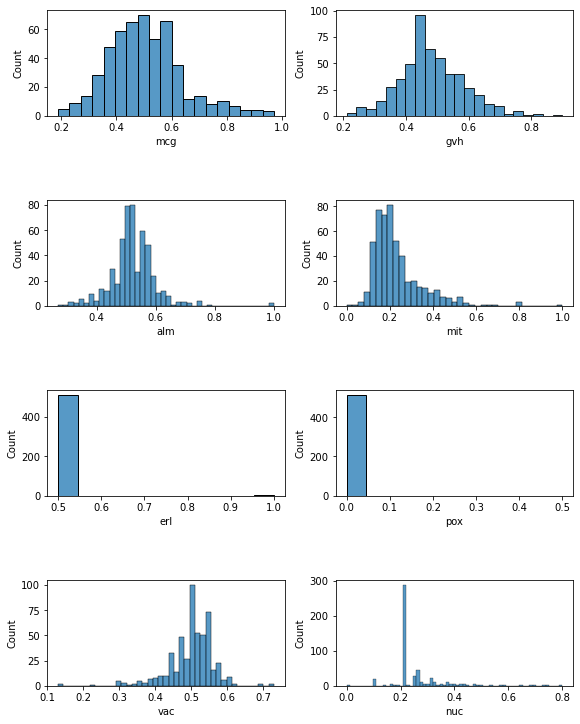

In [20]:
fig,axes = plt.subplots(4,2,figsize=(8, 10)) #Distribution of data
index =0
axes=axes.flatten()
for j in X:
    sns.histplot(X[j],ax=axes[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0) 

From the above figure we can see the feature 'erl' have only two values,need to check with the count. Column 'pox' is having only one value. These two variables might not be useful to our model building, need to confirm using other feature importance analyse methods. We can observe small skewness also need to check.

In [21]:
X.erl.value_counts()

0.5    509
1.0      5
Name: erl, dtype: int64

In [22]:
X.pox.value_counts()

0.0    513
0.5      1
Name: pox, dtype: int64

Our assumption for 'erl' was correct it is having two data values 0.5 and 1.0. But for the 'pox' there is two types of values(0.0 and 0.5) instead of 1 as we assumed.

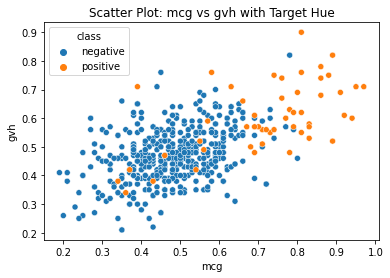

In [25]:
sns.scatterplot(data=X, x='mcg', y='gvh', hue=df['class'])
plt.xlabel('mcg')
plt.ylabel('gvh')
plt.title('Scatter Plot: mcg vs gvh with Target Hue')
plt.show()

'mcg' and 'gvh' is showing a good structure in the plot so we did a multivariate plot for the two with the target class. We can see that higher values tends to be of the positive class.

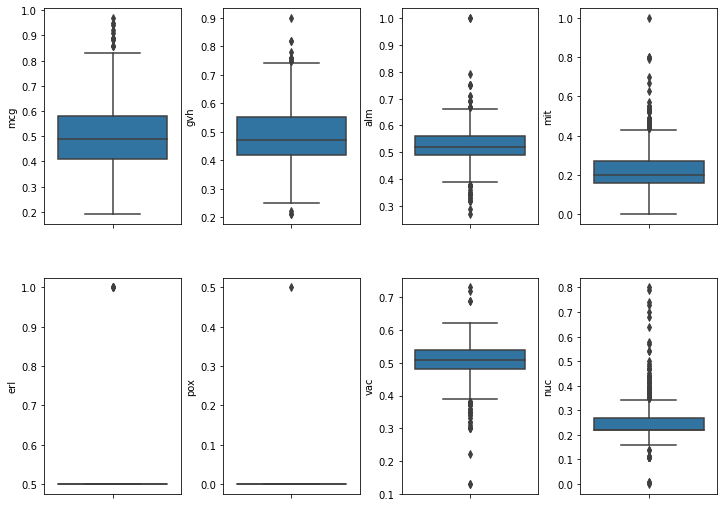

In [31]:
#Checking for outliers 
fig,axes = plt.subplots(2,4,figsize=(10, 7))
index =0
axes=axes.flatten()
for j in X:
    sns.boxplot(y=j,data=X,ax=axes[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)  

It seems like every data is having high outliers, since we are only having few data values its difficult to remove them, only option is replacing. But we are currently not going to do that. If the model accuracy is not enough we will comeback to this. The 'erl' and 'pox' is also having outliers, who knows whether that second value is an outliers or not. If then the two features are of no use.

In [32]:
#Lets check for the target value distribution
y.value_counts()

negative    463
positive     51
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

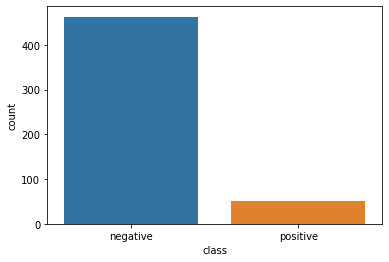

In [33]:
sns.countplot(x='class',data=df)

There is a high class imbalance in the target value and high chance for the model to be biased.

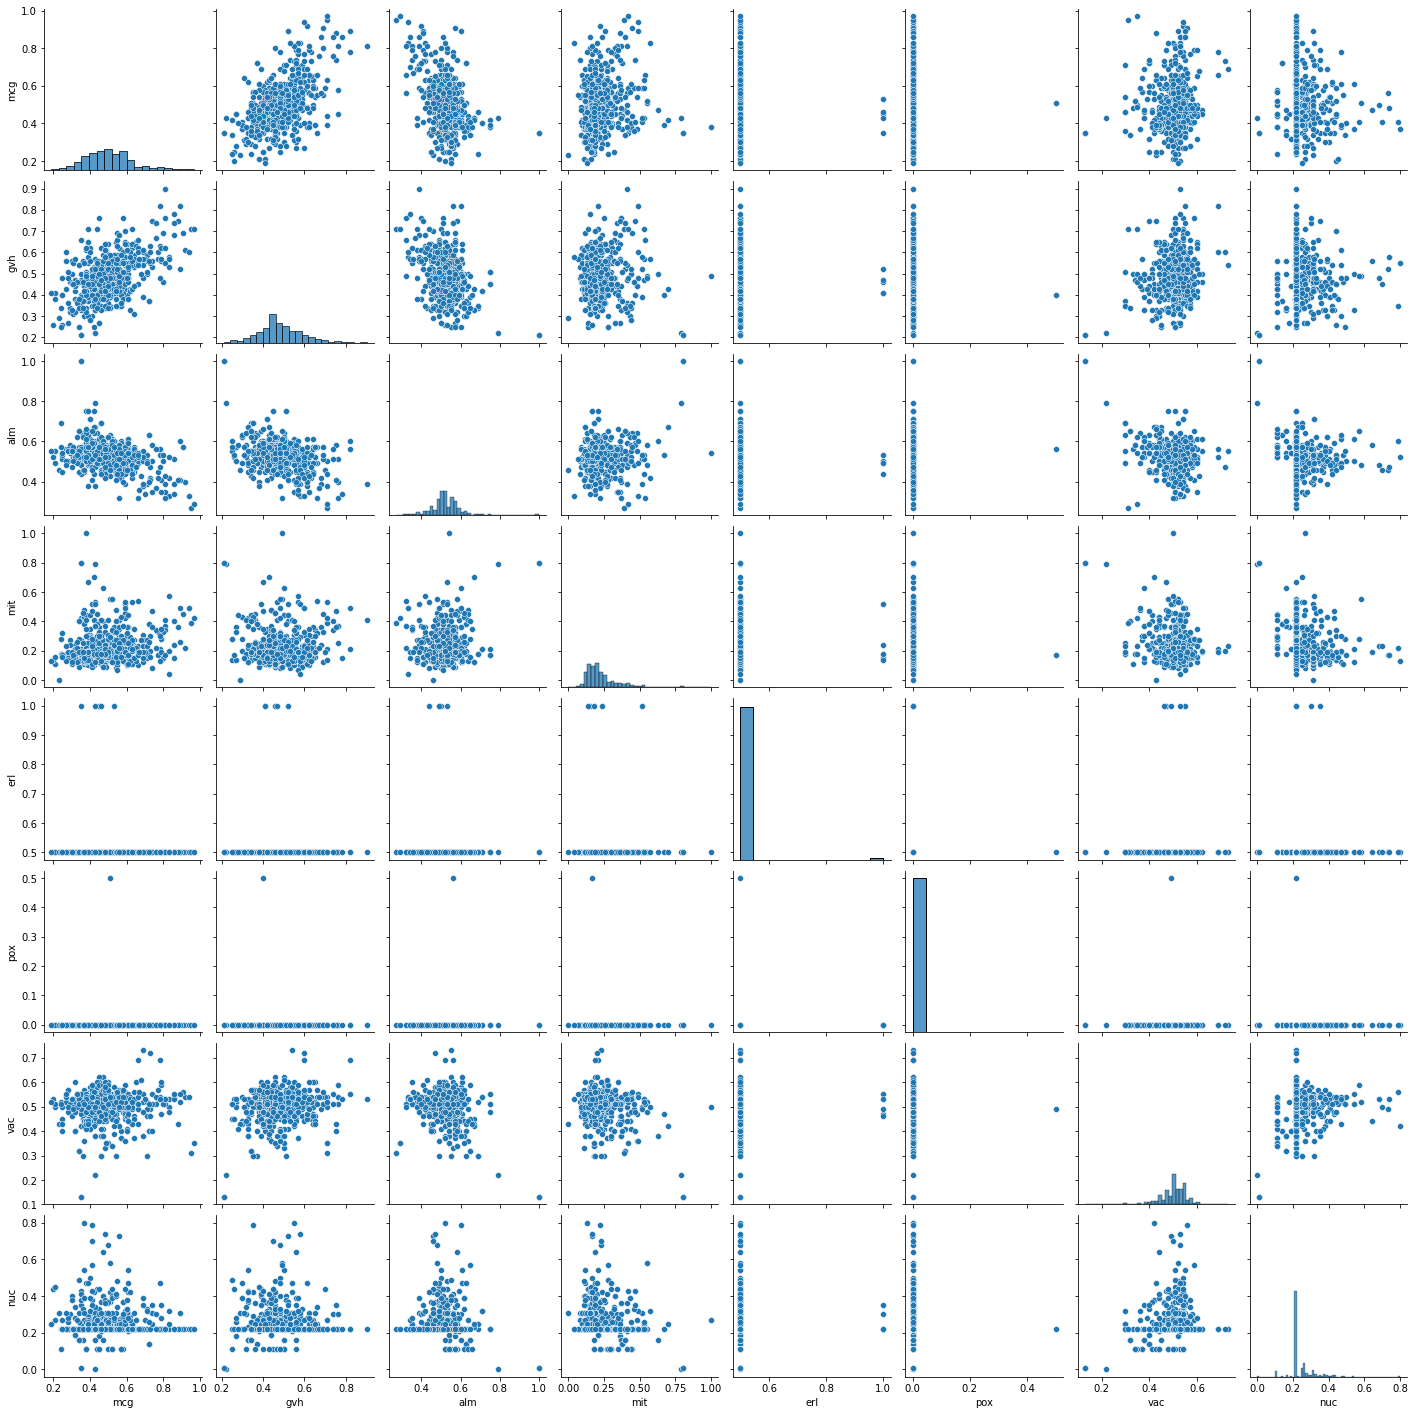

In [34]:
#Lets check for the correlation of the features.
sns.pairplot(X)

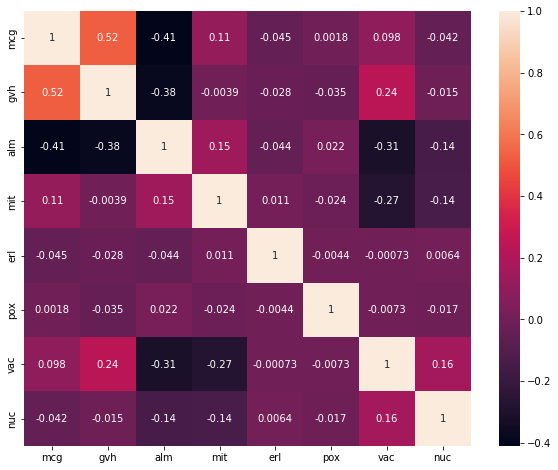

In [35]:
plt.figure(figsize=(10,8)) #Heatmap of correaltion
sns.heatmap(X.corr(),annot=True)
plt.show()

From the above pairplot and heatmap we can find any highly correlated data, the only observable correalation is between features 'mcg' and 'gvh'

Lets use some other methods to check the feature importance.

There are many methods to find the feature importance for prediction of the class. Some of them are Logistic Regression Feature Importance,Random Forest Feature Importance, Decision Tree Feature Importance etc<b>(How to Calculate Feature Importance With Python(2020):Tutorial Overview)</b>

Here we are using Decision Tree Classifier and Random Forest Classifier to find the importance of features of our dataset.

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=8)
dtc.fit(X, y)

# Get feature importances
FI_dtc = dtc.feature_importances_ #returns feature importance

print("Feature Importance using DecisionTree Classifier.\n")
# Display feature importances
for feature, importance in enumerate(FI_dtc):
    print(f"Feature: {feature}, Importance: {importance}")



Feature Importance using DecisionTree Classifier.

Feature: 0, Importance: 0.2560991192933868
Feature: 1, Importance: 0.025395615409590764
Feature: 2, Importance: 0.556190615363638
Feature: 3, Importance: 0.04689652509460144
Feature: 4, Importance: 0.018139725292564832
Feature: 5, Importance: 0.0
Feature: 6, Importance: 0.0746037429305121
Feature: 7, Importance: 0.022674656615706036


In [37]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=8)
rfc.fit(X, y)

# Get feature importances
FI_rfc = rfc.feature_importances_

# Display feature importances
print("Feature Importance using RandomForest Classifier.\n")
for feature, importance in enumerate(FI_rfc):
    print(f"Feature: {feature}, Importance: {importance}")

Feature Importance using RandomForest Classifier.

Feature: 0, Importance: 0.33085021408942616
Feature: 1, Importance: 0.12713424994559613
Feature: 2, Importance: 0.3773408481256515
Feature: 3, Importance: 0.07371046451195049
Feature: 4, Importance: 0.0070668802446162025
Feature: 5, Importance: 2.8192373076781735e-06
Feature: 6, Importance: 0.05078008769668287
Feature: 7, Importance: 0.03311443614876896


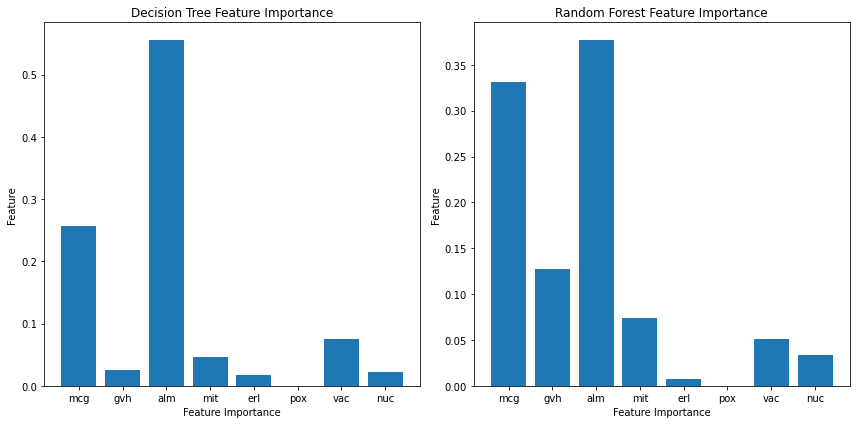

In [38]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Decision Tree feature importances
ax1.bar(X.columns, FI_dtc)
ax1.set_xlabel('Feature Importance')
ax1.set_ylabel('Feature')
ax1.set_title('Decision Tree Feature Importance')

# Plot Random Forest feature importances
ax2.bar(X.columns, FI_rfc)
ax2.set_xlabel('Feature Importance')
ax2.set_ylabel('Feature')
ax2.set_title('Random Forest Feature Importance')

# Adjust layout
plt.tight_layout()
plt.show()

From the above feature importances we found:
* 'mcg' feature has good importance on the model.
* 'gvh' feature, the importance varies between the classifiers. Random Forest is giving good value.
* 'alm' feature is having the highest feature importance in both classifiers.
* 'mit' features gives moderate importance, this is increased in RandomForest.
* 'erl' and 'pox' both are completely negligible, it's giving less importance and from our previous findings its proven.
* 'vac' Its giving moderate importance.
* 'nuc' Decision Tree gave low importance but RandomForest increased it.




High difference in feature importance values show how weak they are and constant values in both shows how important and how will they influence in the classification process.

4. Create three supervised machine learning (ML) models except any ensemble approach for predicting presence or absence of protein.<br>
    a. Report performance score using a suitable metric. Is it possible that the presented result is an overfitted one? Justify.

In [39]:
#Before using any algorithm lets split the data into train and test.
#And lets scale the data.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
#Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
#Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression() #Fitting the model
LR_model.fit(X_train_scaled,y_train)
LR_pred = LR_model.predict(X_test_scaled)
LR_pred_train = LR_model.predict(X_train_scaled) #To check overfitting

#The performance metrics
accuracy_LR = accuracy_score(y_test,LR_pred)
precision_LR = precision_score(y_test, LR_pred,pos_label='positive')
recall_LR = recall_score(y_test, LR_pred,pos_label='positive')
f1_LR = f1_score(y_test, LR_pred,pos_label='positive')

print("The accuracy score of Logistic Regression: ",accuracy_LR)
print("The precision score of Logistic Regression: ",precision_LR)
print("The recall score of Logistic Regression: ",recall_LR)
print("The f1 score of Logistic Regression: ",f1_LR)


The accuracy score of Logistic Regression:  0.9514563106796117
The precision score of Logistic Regression:  0.8
The recall score of Logistic Regression:  0.5
The f1 score of Logistic Regression:  0.6153846153846154


In [41]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

    negative       0.96      0.99      0.97        95
    positive       0.80      0.50      0.62         8

    accuracy                           0.95       103
   macro avg       0.88      0.74      0.79       103
weighted avg       0.95      0.95      0.95       103



In [42]:
print("The accuracy on train data for Logistic Regression: ", accuracy_score(y_train,LR_pred_train))

The accuracy on train data for Logistic Regression:  0.9586374695863747


The LogisticRegression model is giving 95% accuracy. But we know the data is highly imbalanced so we need to consider precision,recall and f1 score. f1 is giving 62% for minor class which is an average value. For a good model it should be high as the major class.<br>

The LogisticRegression is not an overfitting model since its training and testing accuracy is almost equal. We can also check this by other methods like CrossValidation.

In [43]:
#KNearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled,y_train)#Fitting the model
knn_pred = knn_model.predict(X_test_scaled)#Making predictions
knn_pred_train = knn_model.predict(X_train_scaled) #To check overfitting

#The performance metrics
accuracy_knn = accuracy_score(y_test,knn_pred)
precision_knn = precision_score(y_test, knn_pred,pos_label='positive')
recall_knn = recall_score(y_test, knn_pred,pos_label='positive')
f1_knn = f1_score(y_test, knn_pred,pos_label='positive')

print("The accuracy score of KNN Classifier: ",accuracy_knn)
print("The precision score of KNN Classifier: ",precision_knn)
print("The recall score of KNN Classifier: ",recall_knn)
print("The f1 score of KNN Classifier: ",f1_knn)

The accuracy score of KNN Classifier:  0.9611650485436893
The precision score of KNN Classifier:  1.0
The recall score of KNN Classifier:  0.5
The f1 score of KNN Classifier:  0.6666666666666666


In [44]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        95
    positive       1.00      0.50      0.67         8

    accuracy                           0.96       103
   macro avg       0.98      0.75      0.82       103
weighted avg       0.96      0.96      0.96       103



In [45]:
print("The accuracy on train data for KNN is : ", accuracy_score(y_train,knn_pred_train))

The accuracy on train data for KNN is :  0.9708029197080292


The KNN Classifier is giving 96% accuracy. Here the f1 score is 67% for minor class value, precision is giving 100% and recall a 50% score.<br>
The KNN classifier model is not  completly overfitting since its training and testing accuracy has only a small difference. We can also check this by other methods like CrossValidation.

In [46]:
#SupportVector Classifier
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled,y_train)#Fitting the model
svm_pred = svm_model.predict(X_test_scaled)#Making predictions
svm_pred_train = svm_model.predict(X_train_scaled) #To check overfitting

#The performance metrics
accuracy_svm = accuracy_score(y_test,svm_pred)
precision_svm = precision_score(y_test, svm_pred,pos_label='positive')
recall_svm = recall_score(y_test, svm_pred,pos_label='positive')
f1_svm = f1_score(y_test, svm_pred,pos_label='positive')

print("The accuracy score of Support Vector Classifier: ",accuracy_svm)
print("The precision score of Support Vector Classifier: ",precision_svm)
print("The recall score of Support Vector Classifier: ",recall_svm)
print("The f1 score of Support Vector Classifier: ",f1_svm)

The accuracy score of Support Vector Classifier:  0.9611650485436893
The precision score of Support Vector Classifier:  1.0
The recall score of Support Vector Classifier:  0.5
The f1 score of Support Vector Classifier:  0.6666666666666666


In [47]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

    negative       0.96      1.00      0.98        95
    positive       1.00      0.50      0.67         8

    accuracy                           0.96       103
   macro avg       0.98      0.75      0.82       103
weighted avg       0.96      0.96      0.96       103



In [48]:
print("The accuracy on train data for Support Vector Classifier is : ", accuracy_score(y_train,svm_pred_train))

The accuracy on train data for Support Vector Classifier is :  0.975669099756691


The Support Vector Classifier is giving 96% accuracy. Here the f1 score is 67% for minor class value, precision is giving 100% and recall a 50% score.
The support vector classifier model is not completly overfitting since its training and testing accuracy has only a small difference. We can also check this by other methods like CrossValidation.

No model were overfitting. SVC or KNN is good model for our model.

    b. Justify different design decisions for each ML model used to answer this question.

<u>Logistic Regression</u>
* Logistic Regression is a simple and powerfull model for binary classification tasks. It's suitable for scenarios where we want to understand the importance of each feature on the prediction. It's mainly effective when the relationship between features and the target value is assumed to be linear.

* Logistic Regression tends to overfit when there are many features.But here there is only 8 features. To counteract this, we chose to use L2 regularization which adds a penalty term to the loss function. The regularization helps prevent overfitting and improves the generalization of the model. We can see this reflected in our performance scores.<br><br>

<u>KNN Classifier</u>
* KNN is a non-parametric and instance-based algorithm. It makes predictions based on the majority class among its k-nearest neighbors. It's a simple model suitable for small to medium-sized datasets. Ours is a small dataset hence its use.

* We've chosen n_neighbors=5 for KNN. The value of k affects the bias-variance trade-off. A lower k can lead to noisy predictions, while a higher k can lead to overly smooth predictions. The choice of k should be guided by cross-validation or domain knowledge.Here we let it be default<br><br>

<u>Support Vector Classifier</u>
* SVM is a powerful model for binary classification that aims to find the hyperplane with the maximum margin between classes. It's effective when the relationship between features and the target is complex and potentially non-linear.

* We've chosen the linear kernel (kernel='linear') for SVM. This kernel is suitable when the data is linearly separable or when the number of features is larger than the number of samples. Other kernels like polynomial or radial basis function (RBF) can also be chosen based on the dataset's characteristics.

    c. Have you optimized any hyper-parameters for each ML model? What are they? Why have you done that? Explain.

No, hyperparameters of any model were not optimized/tuned. Hyperparameter tuning plays an important role in building a good optimal model. There is a huge possibility for our three models to use optimized hyper-parameters.<br>
* The logistic regression have the hyperparameter 'C' which controls the inverse of the regularization strength. Optimizing this hyperparameter could help strike a balance  between Overfitting and Underfitting.
* The KNN classifier have the 'n_neighbor' hyperparameter which determines how many nearest neighbors to consider for classification. It should be properly balanced since large K value can capture noise and small K value would miss essential information.
* The SVC have kernal hyperparameter which is used to capture different relations between each datapoints. Good kernel value can help the model to find hidden patterns in the data. So need to optimize this.<br><br>
Above hyperparameters could be optimized to get a better result for our three models.

    d. Finally, make a recommendation based on the reported results and justify it.

Based on the reported results, we can make a recommendation regarding the choice of model for predicting the presence or absence of a protein. All three models have produced high accuracy on the test data. But there is difference when coming to other metrics like precision,recall and f1score. The high precision scores for KNN and SVC (1.0000) indicate that when they predict a positive class (presence of protein), they are highly likely to be correct. However, the recall scores for all three models (0.5000) indicate that they tend to miss some instances of the positive class.<br>

Almost all scores are similar with only slight difference. It is advisable to use Logistic Regression model for the dataset.This is because all three models are producing comparable scores, but when taking the complexity of the model we tend to choose Logistic Regression. This is a simple model, it is easier to understand the working and the relation between the data. The less chance of Overfitting is with Logistic Regression.

## <u>Reference List</u>

Machine Learning Mastery (30 March 2020)How to Calculate Feature Importance With Python, accessed 18 August 2023.<br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/<br><br>

Towards Data Science (30 December 2020)Parameters and Hyperparameters in Machine Learning and Deep Learning, accessed 18 August 2023.<br>
https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac<br><br>

Towards Data Science(22 August 2019) What’s the difference between Linear Regression, Lasso, Ridge, and ElasticNet in sklearn?, accessed 18 August 2023.<br>
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

TutorialsPoint (25 April 2023)Difference Between Parameters and Hyperparameters, accessed 18 August 2023.<br>
https://www.tutorialspoint.com/difference-between-parameters-and-hyperparameters